<a href="https://colab.research.google.com/github/UtsavBhatt/Data-Science/blob/master/UtsavDS_TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

  Using cached prophet-1.0.1.tar.gz (65 kB)
  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Using cached ujson-5.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43 kB)


In [ ]:
from fbprophet import Prophet
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
df=pd.read_csv(io.BytesIO(uploaded['HDFCBANK.csv']))
df

Saving HDFCBANK.csv to HDFCBANK (1).csv


,ds,Open,High,Low,Close,y,Volume
0,01-01-1996,3.030000,3.030000,2.925000,2.980000,0.595425,350000.0
1,02-01-1996,2.980000,3.025000,2.950000,2.975000,0.594426,412000.0
2,03-01-1996,2.975000,2.995000,2.950000,2.985000,0.596424,284000.0
3,04-01-1996,2.985000,2.980000,2.940000,2.965000,0.592428,282000.0
4,05-01-1996,2.965000,2.980000,2.950000,2.960000,0.591429,189000.0
...,...,...,...,...,...,...,...
6224,08-09-2020,1114.000000,1118.800049,1103.000000,1112.449951,1112.449951,7312459.0
6225,09-09-2020,1101.000000,1110.000000,1091.250000,1096.500000,1096.500000,7864436.0
6226,10-09-2020,1103.000000,1104.849976,1084.000000,1090.550049,1090.550049,7594044.0
6227,11-09-2020,1096.449951,1104.849976,1071.000000,1078.650024,1078.650024,10397365.0


In [ ]:
df_new=df[['ds','y']]
df_new

,ds,y
0,01-01-1996,0.595425
1,02-01-1996,0.594426
2,03-01-1996,0.596424
3,04-01-1996,0.592428
4,05-01-1996,0.591429
...,...,...
6224,08-09-2020,1112.449951
6225,09-09-2020,1096.500000
6226,10-09-2020,1090.550049
6227,11-09-2020,1078.650024


In [ ]:
df_new=df_new.dropna().drop_duplicates()
df_new

,ds,y
0,01-01-1996,0.595425
1,02-01-1996,0.594426
2,03-01-1996,0.596424
3,04-01-1996,0.592428
4,05-01-1996,0.591429
...,...,...
6224,08-09-2020,1112.449951
6225,09-09-2020,1096.500000
6226,10-09-2020,1090.550049
6227,11-09-2020,1078.650024


In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(df_new)

In [ ]:
future=m.make_future_dataframe(periods=30)
print(future.to_string)

<bound method DataFrame.to_string of              ds
0    1996-01-01
1    1996-01-02
2    1996-01-03
3    1996-01-04
4    1996-01-05
...         ...
6127 2021-01-03
6128 2021-01-04
6129 2021-01-05
6130 2021-01-06
6131 2021-01-07

[6132 rows x 1 columns]>


In [ ]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,0.053756,-55.742456,76.720097,0.053756,0.053756,11.757990,11.757990,11.757990,-2.173028,-2.173028,-2.173028,-0.337138,-0.337138,-0.337138,14.268157,14.268157,14.268157,0.0,0.0,0.0,11.811746
1,1996-01-02,0.058927,-53.300855,77.718124,0.058927,0.058927,12.707645,12.707645,12.707645,-2.173028,-2.173028,-2.173028,0.021970,0.021970,0.021970,14.858703,14.858703,14.858703,0.0,0.0,0.0,12.766571
2,1996-01-03,0.064097,-57.849076,72.669297,0.064097,0.064097,12.916880,12.916880,12.916880,-2.173028,-2.173028,-2.173028,-0.212657,-0.212657,-0.212657,15.302566,15.302566,15.302566,0.0,0.0,0.0,12.980977
3,1996-01-04,0.069268,-55.238062,80.053955,0.069268,0.069268,14.542005,14.542005,14.542005,-2.173028,-2.173028,-2.173028,1.112813,1.112813,1.112813,15.602220,15.602220,15.602220,0.0,0.0,0.0,14.611273
4,1996-01-05,0.074438,-59.985790,77.149215,0.074438,0.074438,13.583027,13.583027,13.583027,-2.173028,-2.173028,-2.173028,-0.006642,-0.006642,-0.006642,15.762698,15.762698,15.762698,0.0,0.0,0.0,13.657465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,2021-01-03,1294.020382,1239.239218,1371.051478,1294.020382,1294.020382,10.996686,10.996686,10.996686,-2.173028,-2.173028,-2.173028,-2.370878,-2.370878,-2.370878,15.540593,15.540593,15.540593,0.0,0.0,0.0,1305.017068
6128,2021-01-04,1294.421038,1240.925875,1370.044160,1294.421038,1294.421038,13.225094,13.225094,13.225094,-2.173028,-2.173028,-2.173028,-0.337138,-0.337138,-0.337138,15.735261,15.735261,15.735261,0.0,0.0,0.0,1307.646132
6129,2021-01-05,1294.821693,1241.350666,1374.037508,1294.821693,1294.821693,13.645010,13.645010,13.645010,-2.173028,-2.173028,-2.173028,0.021970,0.021970,0.021970,15.796068,15.796068,15.796068,0.0,0.0,0.0,1308.466703
6130,2021-01-06,1295.222349,1236.526458,1375.626005,1295.222349,1295.222349,13.346260,13.346260,13.346260,-2.173028,-2.173028,-2.173028,-0.212657,-0.212657,-0.212657,15.731946,15.731946,15.731946,0.0,0.0,0.0,1308.568609


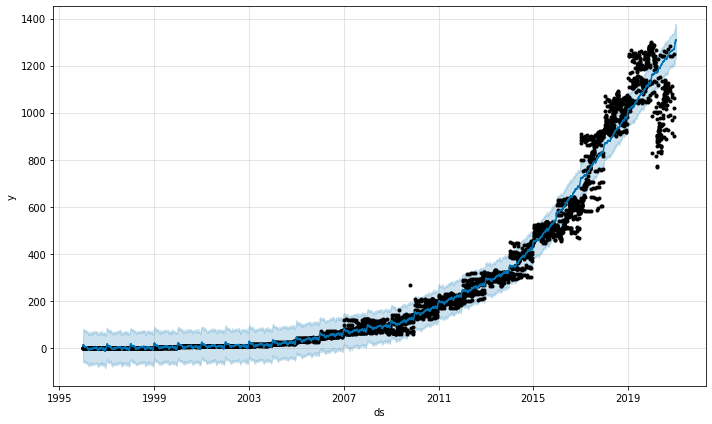

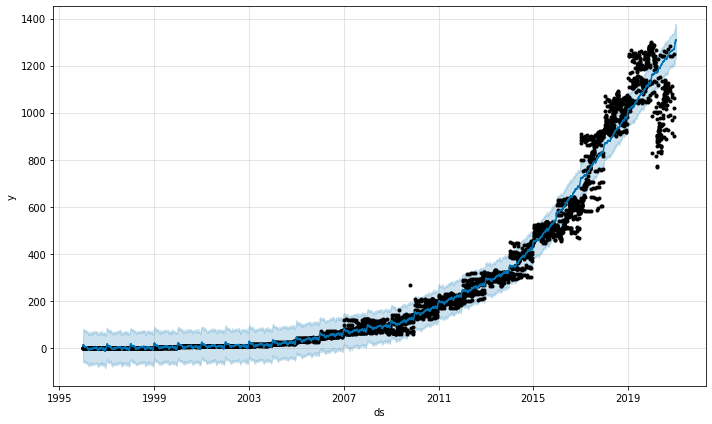

In [ ]:
m.plot(forecast)

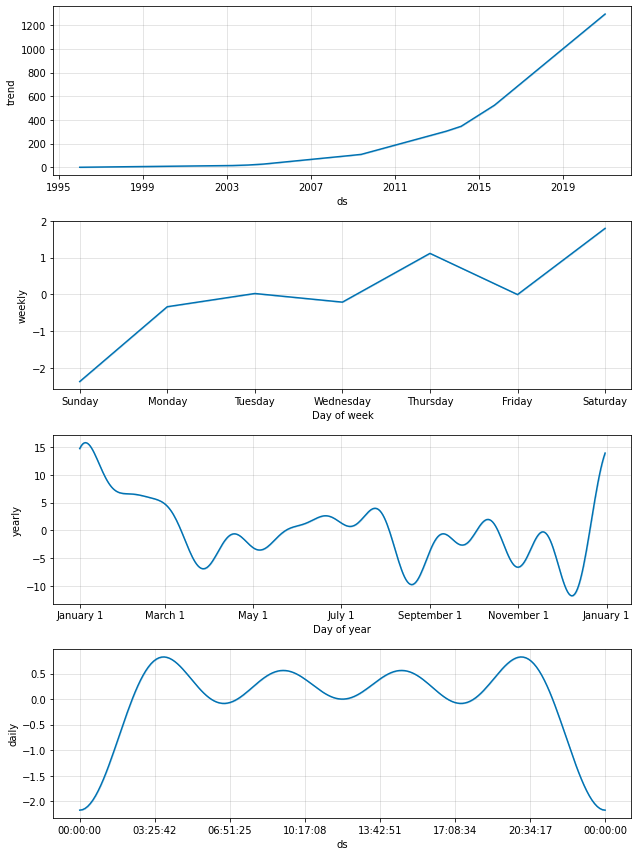

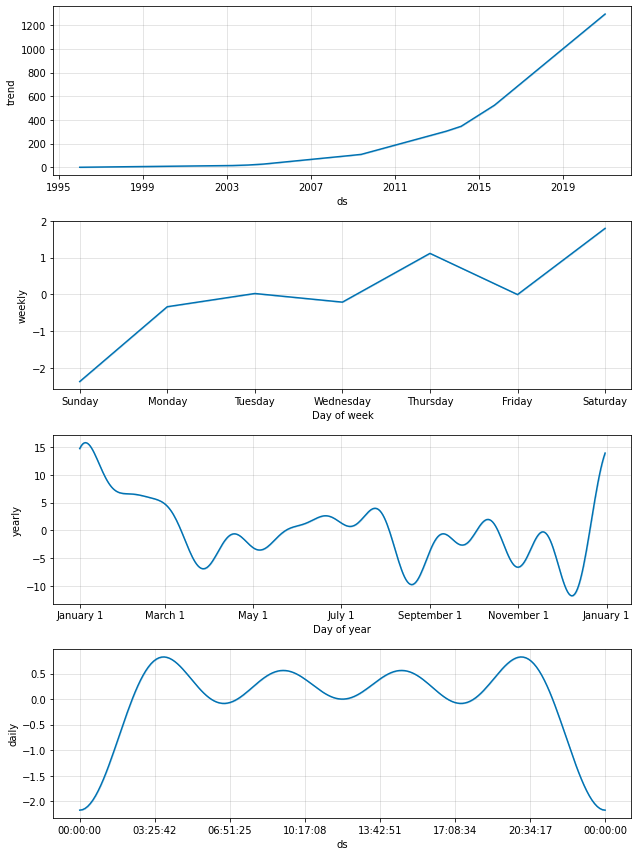

In [ ]:
m.plot_components(forecast)